In [1]:
import os
import pathlib
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gemmi

## Goal: % of structures with 
a) only crystallographic ligands  
b) no crystallographic ligands  

In [24]:
# Test on a single PDB file.
structure = gemmi.read_structure("/Users/mingbin/Desktop/Wankowicz_lab_Mac/Projects/water/data/pdb_redo_data/2yp9_final.pdb")


In [2]:
AA=['ALA', 'ARG', 'ASN', 'ASP', 'CYS', 'GLN', 'GLU', 'GLY', 'HIS', 'ILE', 'LEU', 'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL']
DNA=['DA', 'DC', 'DG', 'DT']
RNA=['A', 'C', 'G', 'U', 'I']
water_res=['HOH', 'WAT']
# Non_crys_HET=['SO4', 'PO4', 'NO3', 'CO3', 'CL', 'NA', 'K', 'MG', 'CA', 'NH4', 'EDO', 'GOL', 'DMS', 'DMSO', 
#               'BME', 'TRS', 'CIT', 'ACT', 'TAR', 'PEG', 'PG4', 'PGE', 'PEO', 'BOG', 'TLA', 'MES', 'HEPES', 
#               'IPA', 'MPD', 'MRD', 'ACY', 'FMT', 'UNX', 'UNL']

In [3]:
# Crystallographic additives/ions.
known_ligands = {
    "MSE": 0,
    "CSO": 0,
    "KAC": 0,
    "TRY": 0,
    "ALY": 0,
    "DMS": 0,
    "CRY": 0,
    "IUM": 0,
    "PG4": 0,
    "AZI": 0,
    "LI1": 0,
    "BCL": 0,
    "SQU": 0,
    "PEG": 0,
    "ACN": 0,
    "B12": 0,
    "BCT": 0,
    "CMO": 0,
    "SRM": 0,
    "HEC": 0,
    "LDA": 0,
    "GAI": 0,
    "BPH": 0,
    "P6G": 0,
    "NET": 0,
    "1PE": 0,
    "PGE": 0,
    "FNE": 0,
    "DMF": 0,
    "CNC": 0,
    "F43": 0,
    "CYC": 0,
    "LMU": 0,
    "DIO": 0,
    "1PG": 0,
    "BET": 0,
    "HEX": 0,
    "URE": 0,
    "EMC": 0,
    "COH": 0,
    "2PE": 0,
    "UVW": 0,
    "PDO": 0,
    "MMC": 0,
    "15P": 0,
    "CDL": 0,
    "L3P": 0,
    "DHE": 0,
    "L2P": 0,
    "MMP": 0,
    "CPS": 0,
    "MA4": 0,
    "IME": 0,
    "C15": 0,
    "PMS": 0,
    "ETA": 0,
    "BO3": 0,
    "TAS": 0,
    "COY": 0,
    "CPQ": 0,
    "L4P": 0,
    "CBD": 0,
    "L1P": 0,
    "OXN": 0,
    "DGA": 0,
    "RTB": 0,
    "OTE": 0,
    "MYS": 0,
    "YBT": 0,
    "DDQ": 0,
    "PHN": 0,
    "BTB": 0,
    "148": 0,
    "NTA": 0,
    "EMT": 0,
    "PG5": 0,
    "TAM": 0,
    "HGB": 0,
    "MBO": 0,
    "F09": 0,
    "HTO": 0,
    "PIG": 0,
    "DTD": 0,
    "CUN": 0,
    "SF4": 0,
    "PTD": 0,
    "HAI": 0,
    "ANL": 0,
    "AUC": 0,
    "REO": 0,
    "PEO": 0,
    "1CU": 0,
    "AS2": 0,
    "COB": 0,
    "BCB": 0,
    "BPB": 0,
    "CL1": 0,
    "CL2": 0,
    "CLA": 0,
    "LMG": 0,
    "PTT": 0,
    "PTE": 0,
    "LHG": 0,
    "FEC": 0,
    "PH1": 0,
    "MP1": 0,
    "ZEM": 0,
    "BLV": 0,
    "MBV": 0,
    "EGC": 0,
    "JEF": 0,
    "LYC": 0,
    "NS5": 0,
    "UPL": 0,
    "LIL": 0,
    "SUM": 0,
    "DOS": 0,
    "LOS": 0,
    "DO3": 0,
    "MPG": 0,
    "IMF": 0,
    "P4C": 0,
    "TWT": 0,
    "SPH": 0,
    "BNG": 0,
    "REP": 0,
    "CFC": 0,
    "B3P": 0,
    "TPT": 0,
    "B7G": 0,
    "PG6": 0,
    "LIM": 0,
    "CFN": 0,
    "FTT": 0,
    "SDS": 0,
    "CLP": 0,
    "DET": 0,
    "CUB": 0,
    "NES": 0,
    "FSX": 0,
    "CXS": 0,
    "SPK": 0,
    "ETE": 0,
    "TRD": 0,
    "MNB": 0,
    "DEM": 0,
    "EA2": 0,
    "CIN": 0,
    "D12": 0,
    "DHD": 0,
    "UND": 0,
    "MPB": 0,
    "ASR": 0,
    "CUM": 0,
    "NFE": 0,
    "DMR": 0,
    "E4N": 0,
    "TCN": 0,
    "DTO": 0,
    "MQD": 0,
    "XCC": 0,
    "144": 0,
    "MRD": 0,
    "3EP": 0,
    "NCO": 0,
    "RTC": 0,
    "PHG": 0,
    "N2P": 0,
    "OMO": 0,
    "CHX": 0,
    "BEO": 0,
    "PYE": 0,
    "BU2": 0,
    "OC4": 0,
    "BO4": 0,
    "TMA": 0,
    "PDT": 0,
    "ROP": 0,
    "LCP": 0,
    "HP3": 0,
    "MAC": 0,
    "MBR": 0,
    "OC3": 0,
    "CUO": 0,
    "OUT": 0,
    "PBM": 0,
    "2BM": 0,
    "ETI": 0,
    "HDN": 0,
    "MM4": 0,
    "PO2": 0,
    "HGI": 0,
    "CNN": 0,
    "PER": 0,
    "HGC": 0,
    "IR": 0,
    "IR3": 0,
    "YT3": 0,
    "W": 0,
    "GD3": 0,
    "4MO": 0,
    "6MO": 0,
    "AL": 0,
    "ARS": 0,
    "AU": 0,
    "BR": 0,
    "CA": 0,
    "CD": 0,
    "CL": 0,
    "CO": 0,
    "CS": 0,
    "CU": 0,
    "CU1": 0,
    "FE": 0,
    "FE2": 0,
    "GD": 0,
    "H2S": 0,
    "HG": 0,
    "IN": 0,
    "K": 0,
    "LI": 0,
    "MG": 0,
    "MN": 0,
    "MN3": 0,
    "MO": 0,
    "NA": 0,
    "NH4": 0,
    "NI": 0,
    "OH": 0,
    "OX": 0,
    "OXO": 0,
    "PB": 0,
    "PT": 0,
    "RB": 0,
    "S": 0,
    "SB": 0,
    "SM": 0,
    "SR": 0,
    "TE": 0,
    "U1": 0,
    "UNX": 0,
    "XE": 0,
    "YB": 0,
    "ZN": 0,
    "6WO": 0,
    "C1O": 0,
    "CYN": 0,
    "IOD": 0,
    "MO1": 0,
    "MOH": 0,
    "MW1": 0,
    "NI1": 0,
    "NMO": 0,
    "NO": 0,
    "O2": 0,
    "OC1": 0,
    "OF1": 0,
    "OXY": 0,
    "SX": 0,
    "ZN3": 0,
    "2MO": 0,
    "ACE": 0,
    "C2O": 0,
    "CCN": 0,
    "CO2": 0,
    "EOH": 0,
    "FEO": 0,
    "FMT": 0,
    "MO2": 0,
    "MW2": 0,
    "NI2": 0,
    "NO2": 0,
    "OC2": 0,
    "OCN": 0,
    "SCN": 0,
    "SO2": 0,
    "ZNO": 0,
    "ACT": 0,
    "ACY": 0,
    "BME": 0,
    "CO3": 0,
    "EDO": 0,
    "EGL": 0,
    "FES": 0,
    "IOH": 0,
    "IPA": 0,
    "MO3": 0,
    "MOS": 0,
    "NO3": 0,
    "PHO": 0,
    "PHS": 0,
    "PO3": 0,
    "SBO": 0,
    "SEO": 0,
    "SFO": 0,
    "SO3": 0,
    "CAC": 0,
    "IMD": 0,
    "IPS": 0,
    "MO4": 0,
    "O4M": 0,
    "PGO": 0,
    "PGR": 0,
    "PI": 0,
    "PO4": 0,
    "SO4": 0,
    "SUL": 0,
    "THJ": 0,
    "VO4": 0,
    "DOX": 0,
    "GOL": 0,
    "MO5": 0,
    "SGM": 0,
    "F3S": 0,
    "FS3": 0,
    "MO6": 0,
    "OC6": 0,
    "DTT": 0,
    "FS4": 0,
    "HED": 0,
    "HEZ": 0,
    "MPD": 0,
    "TMN": 0,
    "TRS": 0,
    "TTN": 0,
    "DPO": 0,
    "POP": 0,
    "MES": 0,
    "MPO": 0,
    "NHE": 0,
    "CLF": 0,
    "EPE": 0,
    "CFM": 0,
    "NH3": 0,
    "BCN": 0,
    "BU1": 0,
    "C8E": 0,
    "PIN": 0,
    "POL": 0,
    "OWQ": 0,
    "F": 0,
    "I": 0,
    "DTN": 0,
    "MOO": 0,
    "CN": 0,
    "WO4": 0,
    "AR": 0,
    "HO": 0,
    "KR": 0,
    "BA": 0,
    "CE": 0,
    "CUA": 0,
    "GA": 0,
    "LU": 0,
    "TB": 0,
    "TL": 0,
    "Y1": 0,
    "ZN1": 0,
    "ZN2": 0,
    "ND4": 0,
    "PD": 0,
    "SE4": 0,
    "PCL": 0,
    "TBR": 0,
    "CFO": 0,
    "NA2": 0,
    "NAO": 0,
    "NAW": 0,
    "NI3": 0,
    "NIK": 0,
    "OC5": 0,
    "OCL": 0,
    "OCM": 0,
    "OF3": 0,
    "CD1": 0,
    "CD3": 0,
    "CD5": 0,
    "MW3": 0,
    "UNK": 0,
    "DUM": 0,
    "DOD": 0,
    "DIS": 0,
    "MTO": 0,
    "CUZ": 0,
    "EEE": 0,
    "F4S": 0,
    "FEA": 0,
    "FSO": 0,
    "OFO": 0,
    "VO3": 0,
    "N": 0,
    "CAT": 0,
    "EU": 0,
    "KO4": 0,
    "MO7": 0,
    "ZO3": 0,
    "1CP": 0,
    "3CO": 0,
    "3NI": 0,
    "AST": 0,
    "BLA": 0,
    "BU3": 0,
    "CN1": 0,
    "CNB": 0,
    "CNF": 0,
    "CP3": 0,
    "CR": 0,
    "CZM": 0,
    "DXE": 0,
    "FLH": 0,
    "HDD": 0,
    "HG9": 0,
    "HNI": 0,
    "LDM": 0,
    "M2M": 0,
    "MCR": 0,
    "ME2": 0,
    "MG8": 0,
    "MHA": 0,
    "MXE": 0,
    "MYY": 0,
    "NFS": 0,
    "OS": 0,
    "OSU": 0,
    "P33": 0,
    "P3G": 0,
    "PE4": 0,
    "PTL": 0,
    "SF3": 0,
    "SOH": 0,
    "SPM": 0,
    "TRT": 0,
    "UNL": 0,
    "V4O": 0,
    "WO5": 0,
    "3PH": 0,
    "AGA": 0,
    "DMX": 0,
    "T3A": 0,
    "AU3": 0,
    "FCO": 0,
    "FMI": 0,
    "FS2": 0,
    "ZH3": 0,
    "ZNH": 0,
    "1FH": 0,
    "2FH": 0,
    "TG1": 0,
    "FC6": 0,
    "MF4": 0,
    "2OF": 0,
    "SMO": 0,
    "PE5": 0,
    "PE8": 0,
    "12P": 0,
    "BH1": 0,
    "F2O": 0,
    "FMR": 0,
    "HTG": 0,
    "PLY": 0,
    "PP9": 0,
    "R16": 0,
    "RSH": 0,
    "VER": 0,
    "BEQ": 0,
    "D1D": 0,
    "DTV": 0,
    "HAS": 0,
    "HHG": 0,
    "PSL": 0,
    "XPE": 0,
    "2OS": 0,
    "D9G": 0,
    "AC9": 0,
    "DVT": 0,
    "RUA": 0,
    "MNH": 0,
    "FS1": 0,
    "CHL": 0,
    "NCP": 0,
    "SE": 0,
    "YOM": 0,
    "YOL": 0,
    "YOK": 0,
    "TOU": 0,
    "202": 0,
    "2ME": 0,
    "1BO": 0,
    "217": 0,
    "HOZ": 0,
    "211": 0,
    "P15": 0,
    "B3H": 0,
    "ZPG": 0,
    "3CM": 0,
    "20S": 0,
    "DMU": 0,
    "CM5": 0,
    "LMT": 0,
    "CE1": 0,
    "PEU": 0,
    "P4G": 0,
    "TWN": 0,
    "DSU": 0,
    "TOE": 0,
    "GLC": 0,
    "GAL": 0,
    "XYS": 0,
    "CIT": 0,
    "SUC": 0,
    "BOG": 0,
    "BEZ": 0,
    "MYR": 0,
    "BGC": 0,
    "PLM": 0,
    "IPH": 0,
    "GCU": 0,
    "XLS": 0,
    "TAR": 0,
    "SIN": 0,
    "XYP": 0,
    "ICT": 0,
    "GLO": 0,
    "XYL": 0,
    "TBU": 0,
    "FLC": 0,
    "FRU": 0,
    "GLB": 0,
    "PNO": 0,
    "BNZ": 0,
    "DCE": 0,
    "DAO": 0,
    "GLA": 0,
    "LIO": 0,
    "TLA": 0,
    "ETF": 0,
    "MAE": 0,
    "TRE": 0,
    "ICI": 0,
    "SPD": 0,
    "DTL": 0,
    "PC2": 0,
    "PC": 0,
    "PEH": 0,
    "PTY": 0,
    "BGL": 0,
    "DPP": 0,
    "NON": 0,
    "DKA": 0,
    "CAF": 0,
    "BZO": 0,
    "MLT": 0,
    "CPO": 0,
    "EPH": 0,
    "SO1": 0,
    "FDC": 0,
    "TTO": 0,
    "TTA": 0,
    "GER": 0,
    "PAM": 0,
    "FAT": 0,
    "DBS": 0,
    "DOA": 0,
    "ICA": 0,
    "ITM": 0,
    "UNA": 0,
    "G4D": 0,
    "GCN": 0,
    "LXC": 0,
    "BOX": 0,
    "OCT": 0,
    "CSB": 0,
    "LIN": 0,
    "SBT": 0,
    "MBN": 0,
    "BNS": 0,
    "IOB": 0,
    "NIN": 0,
    "PIH": 0,
    "BF2": 0,
    "BEF": 0,
    "BF4": 0,
    "AF3": 0,
    "ALF": 0,
    "MGF": 0,
    "AGC": 0,
    "HGP": 0,
    "N8E": 0,
    "NBB": 0,
    "SOG": 0,
    "MLA": 0,
    "DCC": 0,
    "8PP": 0,
    "DT3": 0,
    "LBT": 0,
    "C14": 0,
    "MLI": 0,
    "BDN": 0,
    "UMQ": 0,
    "NDS": 0,
    "D10": 0,
    "PEE": 0,
    "P3A": 0,
    "PEF": 0,
    "MTV": 0,
    "MRY": 0,
    "CMH": 0,
    "1EM": 0,
    "CB5": 0,
    "VCA": 0,
    "5AX": 0,
    "SRT": 0,
    "2BR": 0,
    "I42": 0,
}

In [4]:
len(AA)

20

In [5]:
len(known_ligands.keys()) # number of know cryogenic ligands.

614

In [6]:
## Search for crystallographic ligands.
# Training set.
train_list = pd.read_csv("/Users/mingbin/Desktop/Wankowicz_lab_Mac/Projects/water/data/train_split.txt", header=None)
train_list = train_list[0].tolist()
# Test set.
test_list = pd.read_csv("/Users/mingbin/Desktop/Wankowicz_lab_Mac/Projects/water/data/test_split.txt", header=None)
test_list = test_list[0].tolist()

## Loop through all pdb files.
pdb_path = pathlib.Path('/Users/mingbin/Desktop/Wankowicz_lab_Mac/Projects/water/data/pdb_redo_data')
pdbs = list(pdb_path.glob('*_final.pdb')) # Pay attention to the pattern of names. A general "*.pdb" would result in duplicate files when looping.
# Train.
pdb_train = []
for a in pdbs:
    name = a.stem.split('_')[0]
    if name in train_list:
        pdb_train.append(a)
# Test.
pdb_test = []
for a in pdbs:
    name = a.stem.split('_')[0]
    if name in test_list:
        pdb_test.append(a)

        

In [9]:
# Create a dictionary of chains and the list of mols of interest for BOTH training and test sets.
data1, data2 = pdb_train, pdb_test
filter = list(known_ligands.keys()) # List of crystallographic ligands.

Cry_train_dict, Cry_test_dict = {}, {}
for cry_dict, data in zip([Cry_train_dict, Cry_test_dict], [data1, data2]):
    for a in data:
        name = a.stem.split('_')[0]
        structure = gemmi.read_structure(str(a))
        # Check model.
        i = 0
        model = structure[i]  # consider the first model (skip if empty)
        while len(model) == 0:  # sometimes the first model is empty
            i += 1
            try:
                model = structure[i]
            except Exception:
                raise ValueError("Can't read valid model from the input PDB file!")
        # Chain.
        sub_dict={}
        for chain in model:
            sub_list=[]
            for res in chain:
                if res.name in filter: # Check if it is not in any of the filter lists.
                    sub_list.append(res.name)
            sub_dict[chain.name] = sub_list # If the chain doesn't contain any crys ligands, it will be stored as an empty list.
        # Summarize as {chain: list of mols of interest}.
        cry_dict[name] = sub_dict

In [11]:
len(Cry_train_dict)

4507

In [12]:
df_Cry_train = pd.DataFrame({'name': list(Cry_train_dict.keys()), 'Cry': list(Cry_train_dict.values())})

In [14]:
df_Cry_train

,name,Cry
0,3lez,"{'A': ['CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA..."
1,7sie,"{'A': ['CA', 'CL']}"
2,6rt3,"{'A': ['EDO', 'EDO', 'EDO', 'EDO', 'EDO', 'EDO..."
3,3qx5,"{'L': [], 'H': ['NA', 'NA', 'PO4', 'GOL'], 'I'..."
4,2hph,"{'A': ['BGC', 'CA']}"
...,...,...
4502,5l2v,"{'A': ['CU', 'P33'], 'B': ['CU']}"
4503,8pb7,"{'A': ['CL', 'CL']}"
4504,6eau,"{'A': ['SO4', 'SO4', 'SO4', 'SO4', 'SO4', 'SO4..."
4505,5kxl,"{'A': ['CL', 'CL', 'CL', 'NA', 'NA', 'ACT']}"


In [15]:
# See the condition dict of one empty list.
print(Cry_train_dict['3lez'])
print(len(Cry_train_dict['3lez'].values()))
print(list(Cry_train_dict['3lez'].values()))
print(list(Cry_train_dict['3lez'].values())[0])
print(len(list(Cry_train_dict['3lez'].values())[0]))


{'A': ['CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CL', 'EPE']}
1
[['CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CL', 'EPE']]
['CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CA', 'CL', 'EPE']
10


In [43]:
# # cry ligand dict
# cry_train_dict OR Cry_train_dict
# # nucleic acid dict
# NA_train_dict
# # non-crystallographic ligand dict
# NC_train_dict
# # amino acid dict.
# AA_train_dict

In [16]:
# Filtering function: all chain lists in the dictionary are empty.
def is_empty(dict):
    for chain in dict.values(): # Any chain list that is not empty will return False.
        if len(chain) != 0:
            return False
    return True

In [17]:
print(is_empty(Cry_train_dict['6eau']))  
print(is_empty(Cry_train_dict['3lez']))

False
False


In [20]:
# 1. Create list of all structures matching the criteria.
have_cry, no_cry = [], []
for structure in pdb_train: 
    name = structure.stem.split('_')[0] # name of the pdb file.
    if is_empty(Cry_train_dict[name]) == False:
        have_cry.append(name)

for name in Cry_train_dict.keys():
    if name not in have_cry:
        no_cry.append(name)

print("Crys lig: ", len(have_cry))
print("No crys acid: ", len(no_cry))
print(len(have_cry+no_cry) == len(pdb_train))

# 2. Create list of all structures matching the criteria. TEST SET.
have_cry_test, no_cry_test = [], []
for structure in pdb_test: 
    name = structure.stem.split('_')[0] # name of the pdb file.
    if is_empty(Cry_test_dict[name]) == False:
        have_cry_test.append(name)

for name in Cry_test_dict.keys():
    if name not in have_cry_test:
        no_cry_test.append(name)

print("Crys lig: ", len(have_cry_test))
print("No crys acid: ", len(no_cry_test))
print(len(have_cry_test+no_cry_test) == len(pdb_test))


Crys lig:  3674
No crys acid:  833
True
Crys lig:  1030
No crys acid:  263
True


In [19]:
for a in pdb_test:
    a = str(a)
    if '6zw2' in a:
        print(True)

Cry_test_dict['6zw2']

True


{'A': ['EDO', 'EDO', 'EDO', 'EDO', 'EDO', 'EDO', 'SO4', 'CL', 'CL', 'EDO'],
 'B': ['EDO', 'CL', 'CL']}

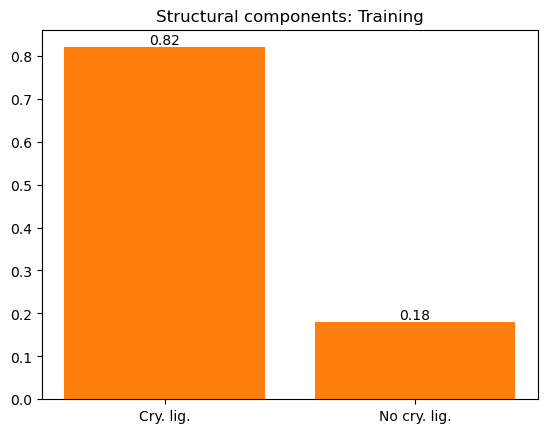

In [21]:
# Plot. Training set.
all_data = [len(have_cry), len(no_cry)] # Number of structures in each category. Might overlap with each other (not exclusive).
percent_data = [round(x/len(pdb_train), 2) for x in all_data] # Percentage of structures in each category. USE ALL TRAIN since they are not exclusive.
plt.bar(range(len(all_data)), percent_data, tick_label=['Cry. lig.', 'No cry. lig.'])
plt.bar_label(plt.bar(range(len(all_data)), percent_data, tick_label=['Cry. lig.', 'No cry. lig.']))
plt.title('Structural components: Training')
plt.savefig('figures/3_per_cry_train.png', dpi=200)
plt.show()


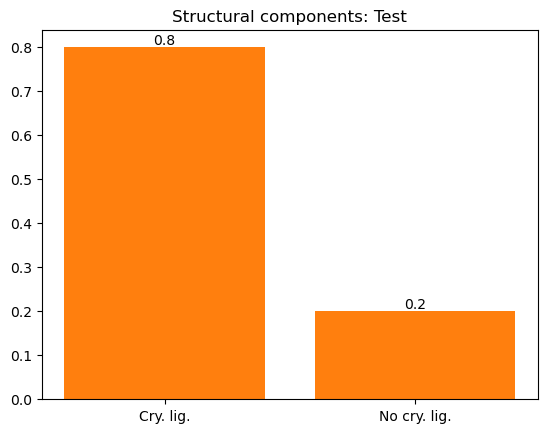

In [22]:
# Plot. Test set.
all_data = [len(have_cry_test), len(no_cry_test)] # Number of structures in each category. Not exclusive.
percent_data = [round(x/len(pdb_test), 2) for x in all_data] # Percentage of structures in each category. 
plt.bar(range(len(all_data)), percent_data, tick_label=['Cry. lig.', 'No cry. lig.'])
plt.bar_label(plt.bar(range(len(all_data)), percent_data, tick_label=['Cry. lig.', 'No cry. lig.']))
plt.title('Structural components: Test')
plt.savefig('figures/3_per_cry_test.png', dpi=200)
plt.show()


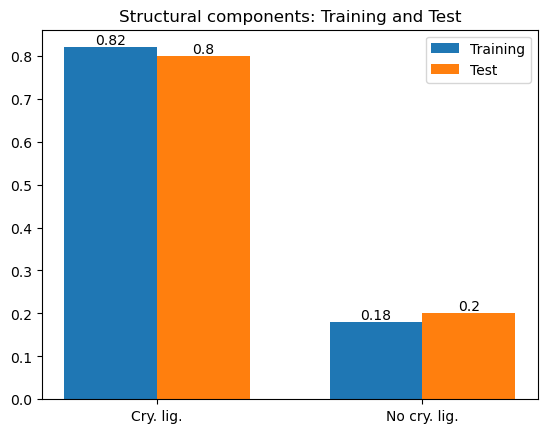

In [23]:
# Plot. Compare training and test set.
# Data.
training_data = [len(have_cry), len(no_cry)]
test_data = [len(have_cry_test), len(no_cry_test)]
per_train = [round(x/len(pdb_train), 2) for x in training_data]
per_test = [round(x/len(pdb_test), 2) for x in test_data]

# Labels.
labels = ['Cry. lig.', 'No cry. lig.']

# width of bars.
width = 0.35

# positions of bars.
x = np.arange(len(labels))

# bar plot.
train_bar = plt.bar(x - width/2, per_train, width, label='Training')
test_bar = plt.bar(x + width/2, per_test, width, label='Test')

# Add bar labels.
plt.bar_label(train_bar, per_train, label_type='edge')
plt.bar_label(test_bar, per_test, label_type='edge')


# set title, legend, and x axis labels.
plt.title('Structural components: Training and Test')
plt.legend()
plt.xticks(x, labels)

plt.savefig('figures/3_per_cry_both.png', dpi=200)
plt.show()
